# campos importantes
## categoricos:
- listing_type_id (categoria cliente?)
- buying_mode (modo compra)
- site_id (jerarquia sitio web)
- category_id (categoria producto?)
- domain_id (?)
- currency_id (tipo moneda)
- official_store_id (que son tiendas oficiales?)



## numericos:
- currency_id
- order_backend (orden productos web) -> son los primeros productos los mas vendidos? quienes tienen mas stock?
- price (precio a la fecha de consulta)
- original_price (con esta columna != null vemos descuentos)
- sale_price (?)
- sold_quantity (articulos vendidos)
- available_quantity (articulos disponibles)

## booleanos:
- accepts_mercadopago

## timestamp:
- stop_time (tiempo finalización publicación)

## diccionarios:
- tags (otras descripciones - jerarquias a investigar)
- seller (otras jerarquias a investigar)
- seller_address (direccion para jerarquia paises, ej: ciudad)
- address (idem anterior)
- attributes (investigar)
- installments (investigar)

--notas:
unicos por id ? (MLA1386115404)
catalog_product_id (MLA21728449)
categoria cliente listing_type_id? 

Foco en descuentos
- Analisis comparativo venta categorías por países (análisis demanda meli tecnologia)
- Analisis precios medios por países (llevar a dolar) inflacion?
- Análisis descuentos medios por países y por categorías
- Análisis si lo que tiene mayor descuento vende más
- Análisis tags (wordcloud) para buscar relaciones de productos con descuentos
- Análisis proporción artículos con descuentos vs total
- Análisis penetración mercado pago por regiones / tipos producto / etc
- Le importa a meli el stock de sus clientes?
- Podemos saber que cliente es fraudulento? -> Ítems con pérdida de exposición en https://developers.mercadolibre.com.ar/es_ar/items-y-busquedas




In [1]:
import pandas as pd
# import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind

search_folder = "/workspaces/ecommerce_analysis/data/stage=raw/source=search/dataformat=parquet"
sites_folder = "/workspaces/ecommerce_analysis/data/stage=raw/source=sites/dataformat=parquet"
publications_folder = "/workspaces/ecommerce_analysis/data/stage=raw/source=search_publications/dataformat=parquet"

money_conversion = {'ARS': 0.0043,
                    'BRL': 0.2,
                    'CLP': 0.0013,
                    'PEN': 0.27}

# written_files = glob.glob(f'{folder}/*')

# for file in written_files:
#     pdf = pd.read_parquet(file, engine="pyarrow")

search_results = pd.read_parquet(search_folder, engine="pyarrow")
sites = pd.read_parquet(sites_folder, engine="pyarrow")
total_publications = pd.read_parquet(publications_folder, engine="pyarrow")

with pd.option_context('display.max_columns', None,):
    display(search_results.head())
    display(sites)
    display(total_publications)


,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,sold_quantity,available_quantity,official_store_id,official_store_name,use_thumbnail_id,accepts_mercadopago,tags,shipping,stop_time,seller,seller_address,address,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,differential_pricing,variation_id,variation_filters,variations_data
0,MLA1401638692,Smart Tv Telefunken 50 4k Tk5022 Sintonizador ...,new,750802-MLA69301030669_052023,MLA22326427,gold_special,https://www.mercadolibre.com.ar/smart-tv-telef...,buy_it_now,MLA,MLA1002,MLA-TELEVISIONS,http://http2.mlstatic.com/D_750802-MLA69301030...,ARS,1,99999.0,135999.0,None,100,150,1938.0,Mercado Libre Electronica,True,True,"[ahora-paid-by-buyer, extended_warranty_eligib...","{'free_shipping': True, 'logistic_type': 'fulf...",2043-04-30T15:28:58.000Z,"{'_': False, 'car_dealer': False, 'car_dealer_...","{'address_line': '', 'city': {'id': None, 'nam...","{'city_id': None, 'city_name': 'Villa Celina',...","[{'attribute_group_id': 'MAIN', 'attribute_gro...","{'amount': 18083.99, 'currency_id': 'ARS', 'qu...",None,True,None,[],CXJN21048,None,None,None,None
1,MLA1364904537,Smart Tv Kodak We-6xst005 4k 60 220v,new,981544-MLA53227715351_012023,MLA21076857,gold_special,https://www.mercadolibre.com.ar/smart-tv-kodak...,buy_it_now,MLA,MLA1002,MLA-TELEVISIONS,http://http2.mlstatic.com/D_981544-MLA53227715...,ARS,2,127999.0,200000.0,None,50,1,NaN,None,True,True,"[ahora-paid-by-buyer, deal_of_the_day, extende...","{'free_shipping': False, 'logistic_type': 'def...",2043-03-31T04:00:00.000Z,"{'_': False, 'car_dealer': False, 'car_dealer_...","{'address_line': '', 'city': {'id': None, 'nam...","{'city_id': None, 'city_name': 'Garín', 'state...","[{'attribute_group_id': 'MAIN', 'attribute_gro...","{'amount': 23147.55, 'currency_id': 'ARS', 'qu...",None,True,None,[],None,None,None,None,None
2,MLA1156297648,Smart Tv Tcl C72-series 50c725 Qled Android Pi...,new,613322-MLA53779631053_022023,MLA18597975,gold_special,https://www.mercadolibre.com.ar/smart-tv-tcl-c...,buy_it_now,MLA,MLA1002,MLA-TELEVISIONS,http://http2.mlstatic.com/D_613322-MLA53779631...,ARS,3,147399.0,NaN,None,5,1,1425.0,Diggit,True,True,"[ahora-paid-by-buyer, extended_warranty_eligib...","{'free_shipping': True, 'logistic_type': 'fulf...",2042-09-21T18:15:41.000Z,"{'_': False, 'car_dealer': False, 'car_dealer_...","{'address_line': '', 'city': {'id': None, 'nam...","{'city_id': None, 'city_name': 'Garin', 'state...","[{'attribute_group_id': 'MAIN', 'attribute_gro...","{'amount': 26655.88, 'currency_id': 'ARS', 'qu...",None,True,None,[],NZKJ32770,None,None,None,None
3,MLA1297400226,Smart Noblex 50 91dk50x6550 4k Sistema Vidaa,new,795066-MLA51934174412_102022,MLA20005522,gold_special,https://www.mercadolibre.com.ar/smart-noblex-5...,buy_it_now,MLA,MLA1002,MLA-TELEVISIONS,http://http2.mlstatic.com/D_795066-MLA51934174...,ARS,4,101999.0,164999.0,None,200,200,1372.0,Mall 360,True,True,"[deal_of_the_day, extended_warranty_eligible, ...","{'free_shipping': True, 'logistic_type': 'cros...",2043-05-03T02:40:59.000Z,"{'_': False, 'car_dealer': False, 'car_dealer_...","{'address_line': '', 'city': {'id': None, 'nam...","{'city_id': None, 'city_name': 'Monte Chingolo...","[{'attribute_group_id': 'MAIN', 'attribute_gro...","{'amount': 18445.67, 'currency_id': 'ARS', 'qu...",None,True,None,[],BKXX23261,None,None,None,None
4,MLA1148941757,Smart Tv Samsung Series 7 Un55au7000gczb Led T...,new,739692-MLA48913871021_012022,MLA18718085,gold_pro,https://www.mercadolibre.com.ar/smart-tv-samsu...,buy_it_now,MLA,MLA1002,MLA-TELEVISIONS,http://http2.mlstatic.com/D_739692-MLA48913871...,ARS,5,175999.0,219999.0,None,500,250,1938.0,Mercado Libre Electronica,True,True,"[extended_warranty_eligible, good_quality_pict...","{'free_shipping': True, 'logistic_type': 'fulf...",2042-11-25T18:00:04.000Z,"

,default_currency_id,id,name
0,COP,MCO,Colombia
1,HNL,MHN,Honduras
2,VES,MLV,Venezuela
3,CLP,MLC,Chile
4,GTQ,MGT,Guatemala
5,BRL,MLB,Brasil
6,CRC,MCR,Costa Rica
7,CUP,MCU,Cuba
8,PYG,MPY,Paraguay
9,DOP,MRD,Dominicana


,total,primary_results,offset,limit,site
0,3474,1000,0,50,MLA
0,3145,1000,0,50,MLB
0,663,663,0,50,MLC
0,899,899,0,50,MPE


In [2]:
total_publications = total_publications[['site', 'total']]
total_publications.columns = ['site_id', 'total_publications']

search_results['has_discount'] = search_results['original_price']\
    .apply(lambda x: 0 if pd.isna(x) else 1)
search_results['discount_percentage'] = search_results\
    .apply(lambda x: x['price']/x['original_price'] - 1 if (x['has_discount']==1) and (~pd.isna(x['price'])) else 0, axis=1)
search_results['price_usd'] = search_results.apply(lambda x: x['price'] * money_conversion[x['currency_id']] if x['currency_id']!='USD' else x['price'], axis=1)

def search_with_total_publications():
    return search_results.merge(total_publications, left_on=['site_id'], right_on=['site_id'], how='left')

assert len(search_results) == len(search_with_total_publications())

search_results = search_with_total_publications()

results_grouped = search_results\
    .groupby('category_id')\
    .agg({'sold_quantity': 'sum',
          'has_discount': 'sum'})\
    .reset_index()

results_grouped.columns = ['category_id', 'sold_quantity_total', 'has_discount_total']

In [3]:
columns_to_normalize = ['sold_quantity']

for col in columns_to_normalize:
    # search_results[f'{col}_norm'] = search_results[col] / search_results[col].mean()
    search_results[f'{col}_norm'] = search_results[col] / (search_results[f'total_publications']/1000)


### ¿Como se distribuyen las publicaciones por site?

[Text(0.5, 1.0, 'Cantidad publicaciones por Site')]

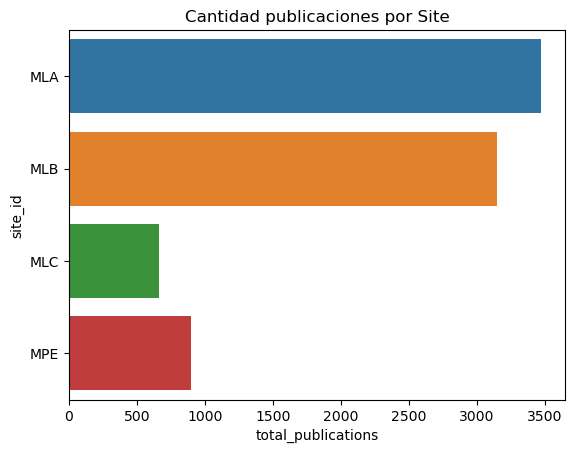

In [4]:
sns.barplot(data=total_publications, x='total_publications', y='site_id')\
    .set(title='Cantidad publicaciones por Site')

### ¿Cómo se distribuyen las publicaciones con descuento por site?

[Text(0.5, 1.0, 'Porcentaje publicaciones con descuento por site')]

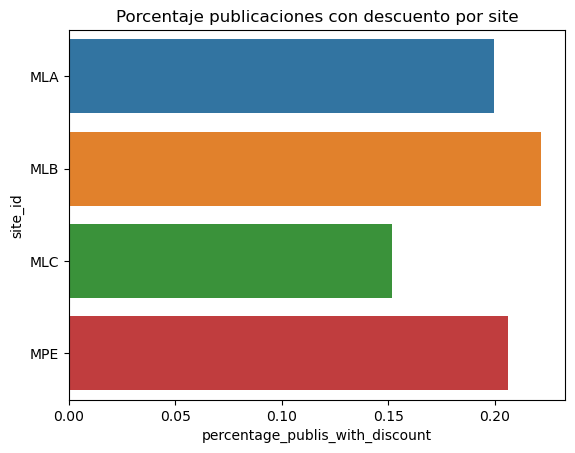

In [5]:
perc_discount_by_site = search_results\
    .groupby(['site_id', 'has_discount'])['total_publications'].count()\
    .reset_index()

perc_discount_by_site['sum_publications'] = perc_discount_by_site.groupby('site_id')['total_publications'].transform('sum')
perc_discount_by_site['percentage_publis_with_discount'] = perc_discount_by_site['total_publications'] / perc_discount_by_site['sum_publications']
perc_discount_by_site

sns.barplot(data=perc_discount_by_site[perc_discount_by_site['has_discount']==1], x='percentage_publis_with_discount', y='site_id')\
    .set(title='Porcentaje publicaciones con descuento por site')

## ¿Cual es la relacion de precios entre sites?

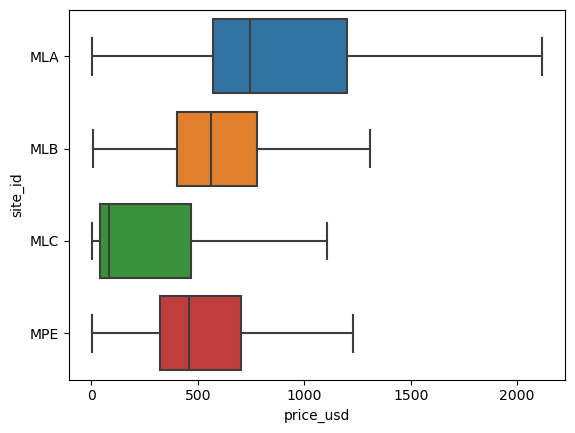

In [6]:
sns.boxplot(data=search_results, x='price_usd', y='site_id', showfliers=False)

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

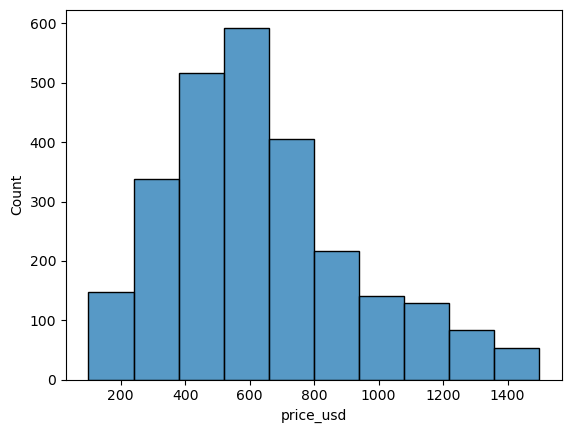

In [32]:
sns.histplot(data=search_results[(search_results['price_usd']>100) & (search_results['price_usd']<1500)], x='price_usd', bins=10)

## Normalizando las ventas por cantidad de publicaciones (~penetracion MeLi), ¿como se comportan por site?

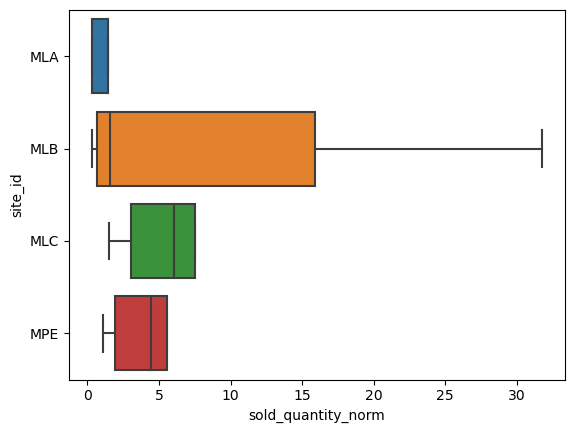

In [7]:
sns.boxplot(data=search_results[search_results['sold_quantity_norm']>0], x='sold_quantity_norm', y='site_id', showfliers=False)

## ¿Como se distribuyen los porcentajes de descuento por sites?

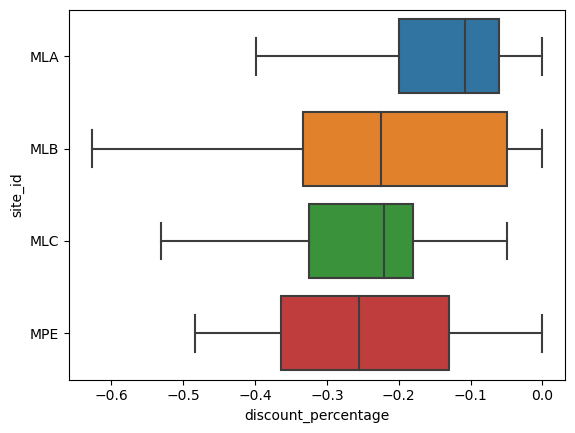

In [8]:
sns.boxplot(data=search_results[search_results['has_discount']==1], x='discount_percentage', y='site_id')

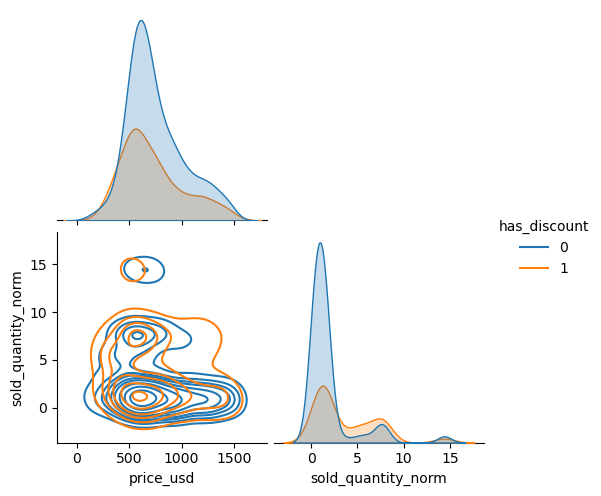

In [34]:
sns.pairplot(data=search_results[(search_results['sold_quantity_norm']>0)
    & (search_results['sold_quantity_norm']<15)
    & (search_results['price_usd']>100)
    & (search_results['price_usd']<1500)][['price_usd', 'sold_quantity_norm','has_discount']], hue='has_discount', kind='kde', corner=True)

## ¿Publicaciones con descuento se venden mas que publicaciones sin descuento?


In [10]:
n_sample = 100
search_results_sample = search_results.sample(n=n_sample, random_state=187)

def hypothesis_test_different_means(group1, group2, n):
    rv = t(df=100-2)

    t_stat, pvalue = ttest_ind(group1, group2, alternative='greater')
    return t_stat, pvalue

hypothesis_test_different_means(search_results_sample[search_results_sample['has_discount']==1]['sold_quantity_norm'], 
                                search_results_sample[search_results_sample['has_discount']==0]['sold_quantity_norm'],
                                n_sample)

(2.753005135015362, 0.003518830004579586)

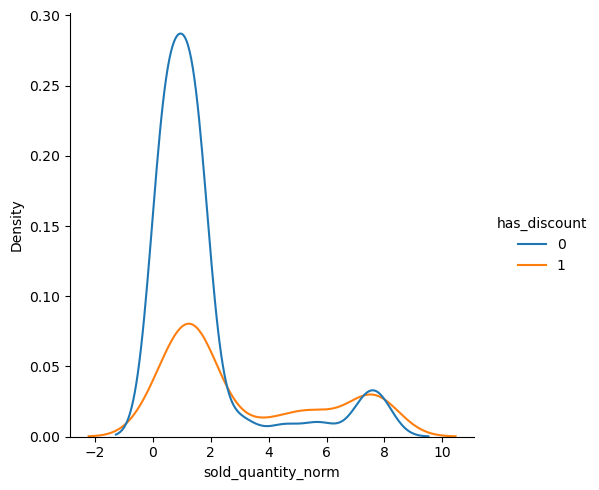

In [11]:
sns.displot(data=search_results[(search_results['sold_quantity_norm']<10)
                                 & (search_results['sold_quantity_norm']>0)], 
            x='sold_quantity_norm', 
            hue='has_discount', 
            kind='kde')

## ¿Permanece este comportamiento por paises?


MLA (1.7521587518148012, 0.04064727721134617)


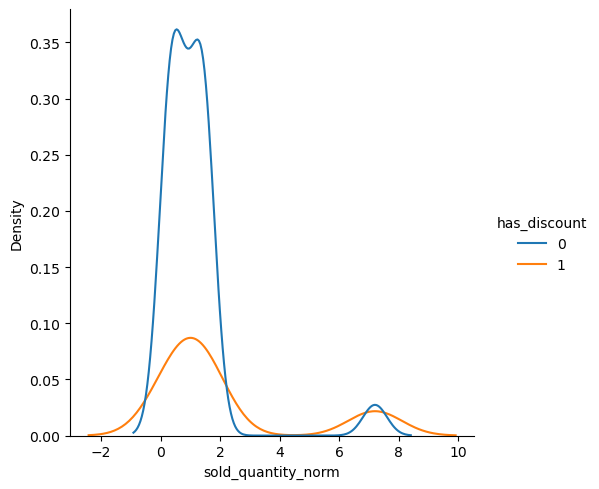

MLB (6.348425892015434, 7.277148128868294e-10)


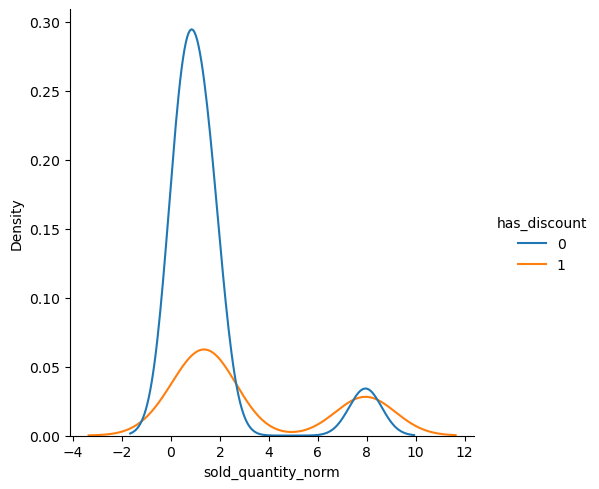

MLC (4.16711731157079, 2.3032919740071974e-05)


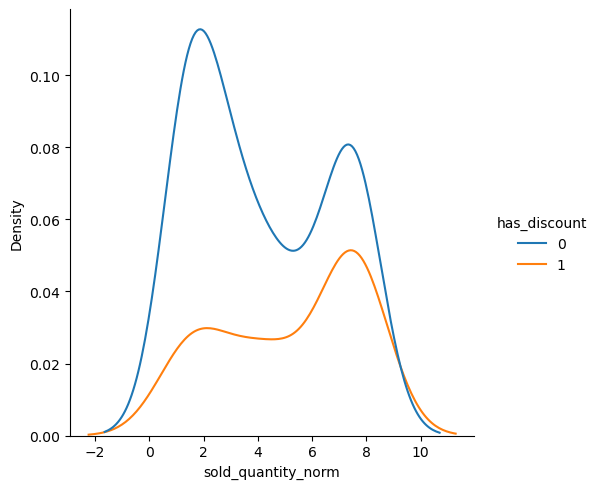

MPE (2.147310027230423, 0.01649211854738951)


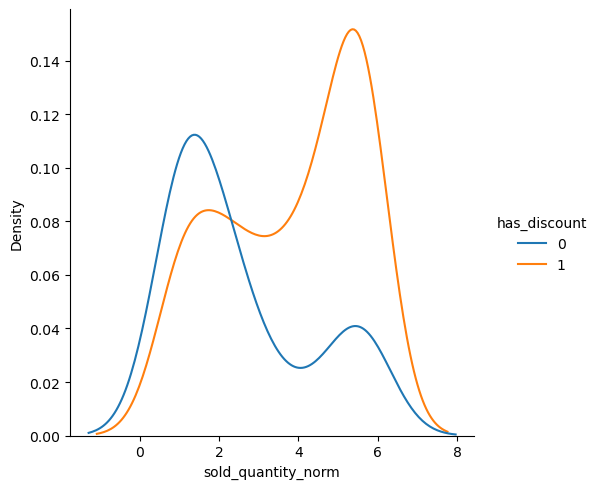

In [12]:
for site_id in ['MLA', 'MLB', 'MLC', 'MPE']:
    n_sample=200
    search_results_sample = search_results[(search_results['site_id']==site_id)].sample(n=n_sample, random_state=187)

    print(site_id, 
          hypothesis_test_different_means(search_results_sample[(search_results_sample['has_discount']==1)]['sold_quantity_norm'], 
                                          search_results_sample[(search_results_sample['has_discount']==0)]['sold_quantity_norm'],
                                          n_sample))
    
    sns.displot(data=search_results[(search_results['sold_quantity_norm']<10) 
                                & (search_results['sold_quantity_norm']>0)
                                & (search_results['site_id']==site_id)], 
                x='sold_quantity_norm', 
                hue='has_discount', 
                kind='kde')
    
    plt.show()

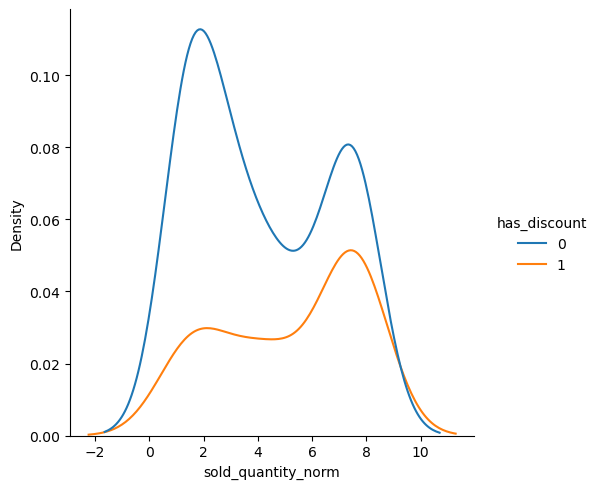

In [13]:
sns.displot(data=search_results[(search_results['sold_quantity_norm']<10) 
                                & (search_results['sold_quantity_norm']>0)
                                & (search_results['site_id']=='MLC')], x='sold_quantity_norm', hue='has_discount', kind='kde')

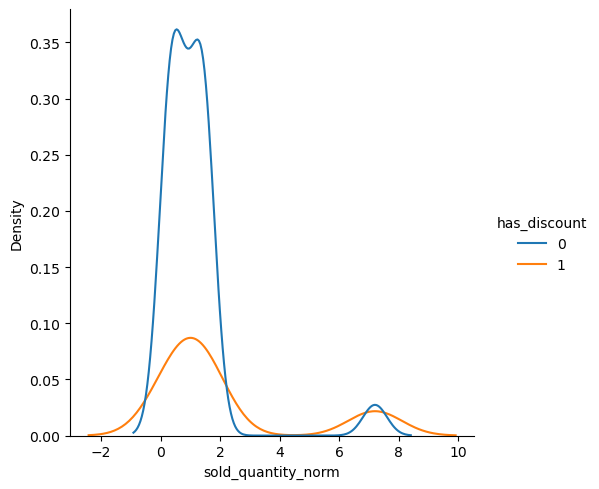

In [14]:
sns.displot(data=search_results[(search_results['sold_quantity_norm']<10) 
                                & (search_results['sold_quantity_norm']>0)
                                & (search_results['site_id']=='MLA')], x='sold_quantity_norm', hue='has_discount', kind='kde')